In [ ]:
 import numpy as np
 import pandas as pd
 import tensorflow as tf
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler
 from sklearn.metrics import confusion_matrix, classification_report
 from tensorflow.keras import layers, models
 import matplotlib.pyplot as plt

In [ ]:
path = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'

In [ ]:
ecg_data = pd.read_csv(path, header=None)

In [ ]:
ecg_data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
X = ecg_data.drop(140, axis=1)
y = ecg_data[140]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
input_dim = X_train.shape[1]

In [ ]:
 encoder = models.Sequential([
     layers.Input(shape=(input_dim,)),
     layers.Dense(32, activation='relu'),
     layers.Dense(16, activation='relu'),
     layers.Dense(8, activation='relu')
 ])

In [ ]:
 decoder = models.Sequential([
     layers.Input(shape=(8,)),
     layers.Dense(16, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(input_dim, activation='linear')
 ])

In [ ]:
 autoencoder = models.Sequential([
     encoder,
     decoder
 ])
 autoencoder.compile(optimizer='adam', loss='mean_squared_error')
 autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8813
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3519
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2809
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2671
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2227
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2036
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1973
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1893
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1882
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1978
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1821
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1867
Epoch 13/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1718
Epoch 14/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1607
Epoch 15/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
print('model training complete')

model training complete


In [ ]:
 #Detect anomalies
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
threshold = np.percentile(mse, 95)
print(f"Anomaly Threshold set to: {threshold}")

Anomaly Threshold set to: 0.24165594051018732


In [ ]:
# Predict anomalies
anomalies = mse > threshold

In [ ]:

num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


In [ ]:
true_anomalies = (y_test == 0)
cm = confusion_matrix(true_anomalies, anomalies)
print("\n--- Confusion Matrix ---")
print(cm)

print("\n--- Classification Report ---")
print(classification_report(true_anomalies, anomalies, target_names=['Normal', 'Anomaly']))



--- Confusion Matrix ---
[[563  28]
 [387  22]]

--- Classification Report ---
              precision    recall  f1-score   support

      Normal       0.59      0.95      0.73       591
     Anomaly       0.44      0.05      0.10       409

    accuracy                           0.58      1000
   macro avg       0.52      0.50      0.41      1000
weighted avg       0.53      0.58      0.47      1000



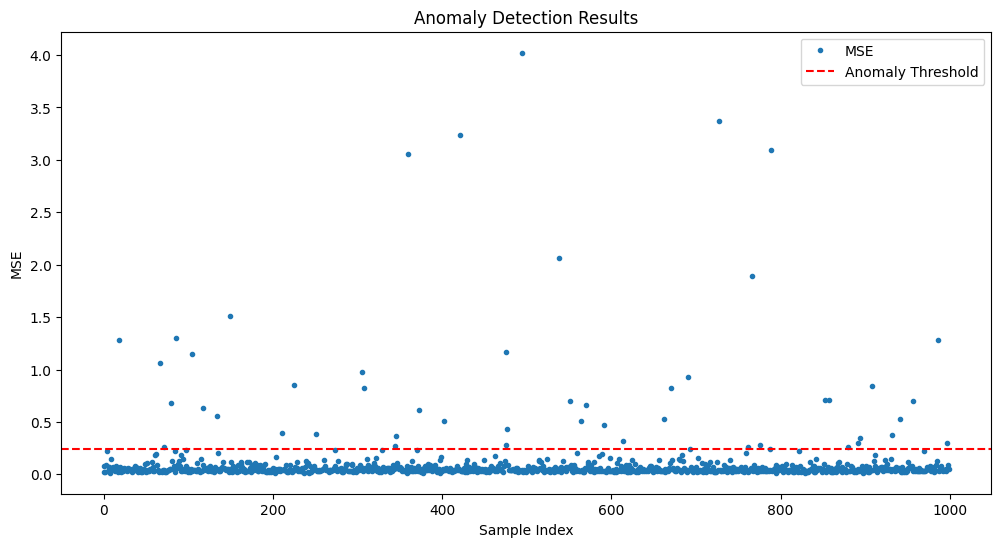

In [ ]:
# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

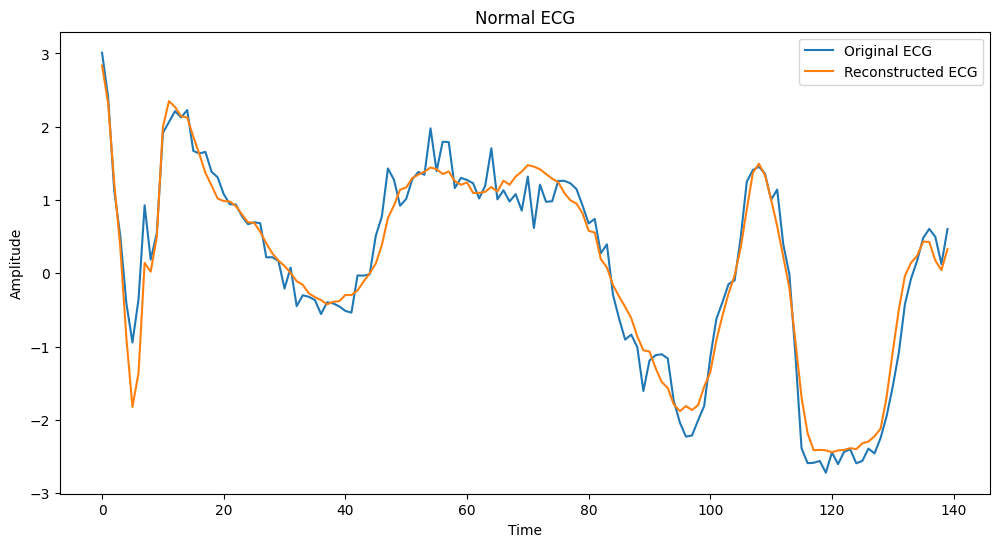

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

In [ ]:
# listing the index of anomalies in X_test
anomalies_index = []
for index, anomaly in enumerate(anomalies):
  if anomaly == True :
    anomalies_index.append(index)

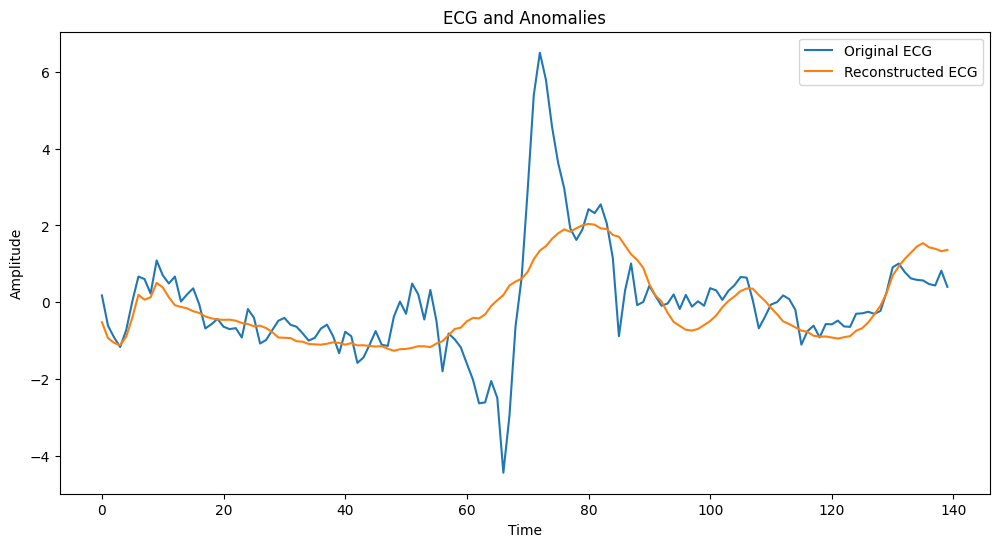

In [ ]:
n = 4
anomaly_index = anomalies_index[n]
plt.figure(figsize=(12, 6))
plt.plot(X_test[anomaly_index], label='Original ECG')
plt.plot(y_pred[anomaly_index], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('ECG and Anomalies')
plt.show()

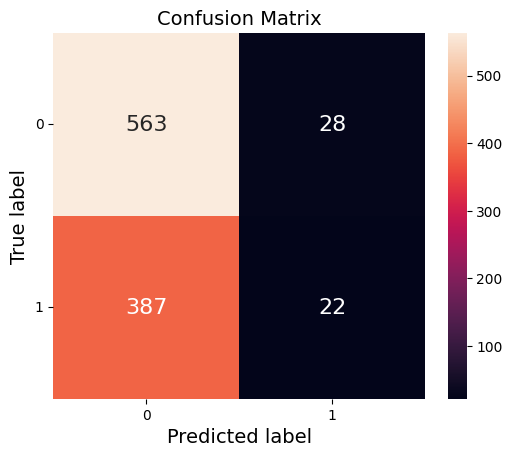

In [ ]:
import seaborn as sns
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(true_anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')
plt.xticks([0.5, 1.5],  rotation = 'horizontal')
plt.yticks([0.5, 1.5],  rotation = 'horizontal')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()